*IMPORTANDO AS BIBLIOTECAS NECESSÁRIAS*

In [1]:
#!pip install sklearn

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly as py
import plotly.graph_objs as go
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

*FAÇA O UPLOAD DO DATASET Mall_Customers.csv PARA O GOOGLE COLAB*


In [3]:
#Se necessário, troque o caminho do arquivo.
df = pd.read_csv('Consumo.csv', sep=',', encoding='1252')
df.tail()

,Cod,Sexo,Idade,Salario Anual (milhares),Score Gastos (0-100)
195,196,Feminino,35,139,79
196,197,Feminino,45,146,28
197,198,Masculino,32,146,74
198,199,Masculino,32,159,18
199,200,Masculino,30,159,83


**PLOTANDO O GRÁFICO DE RENDA X PONTUAÇÃO**

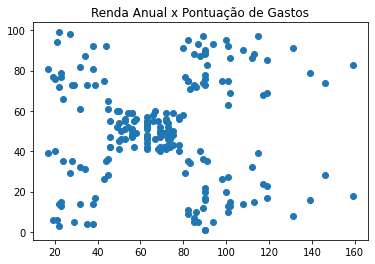

In [4]:
plt.scatter(x = 'Salario Anual (milhares)', y = 'Score Gastos (0-100)', data = df)
plt.title('Renda Anual x Pontuação de Gastos')
plt.show()

**EXECUÇÃO DO KMEANS COM 2 CLUSTERS**

In [5]:
X2 = df[['Salario Anual (milhares)', 'Score Gastos (0-100)']].iloc[:,:].values

#Insira aqui o código que executa o algoritmo k-means com 2 clusters.

In [6]:
n_clusters = 2     # numero de grupos que os dados serão agrupados.Default=8
init = 'k-means++' # Modo de iniciar os centroides Opções: Default:'k-means++', 'random','ndarray'
max_iter = 300     # Quantidade de vezes que irá executar.Default:300 
n_jobs   = 4       # Quantas CPU's:
kmeans = KMeans(n_clusters=n_clusters, init=init, max_iter=max_iter, n_init=10)
pred_y = kmeans.fit_predict(X2)     #Executar o algoritmo e agrupar os dados
print(pred_y)
print('Inertia:', kmeans.inertia_)
print("Centroids:")
print(kmeans.cluster_centers_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Inertia: 198401.00202020197
Centroids:
[[92.14545455 50.12727273]
 [43.24444444 50.28888889]]


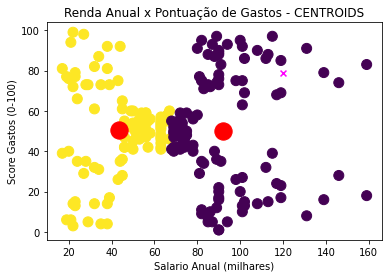

Cluster do novo registro : [0]


In [23]:
## NOVO REGISTRO PARA SER CLASSIFICADO:
# Caso gosariamos de classificar um novo registro Salario Anual (milhares) = 120,  Score Gastos (0-100)= 10).
# Como o K-Means classificará o novo registro:
n1=120
n2=79

plt.scatter(X2[:, 0], X2[:,1], s = 100, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red',label = 'Centroids')
plt.scatter(n1,n2,c = 'magenta', s = 35, marker='x', label = 'Novo Registro')
plt.title('Renda Anual x Pontuação de Gastos - CENTROIDS')
plt.xlabel('Salario Anual (milhares)')
plt.ylabel('Score Gastos (0-100)')
#plt.legend()

plt.show()

# Agrupar um novo registro
data= np.array([[n1, n2]]) 
cluster = kmeans.predict(data)
print('Cluster do novo registro :', cluster )

**EXECUÇÃO DO KMEANS COM 6 CLUSTERS**

In [7]:
#Insira aqui o código que executa o algoritmo k-means com 6 clusters.

In [8]:
n_clusters = 6     # numero de grupos que os dados serão agrupados.Default=8
init = 'k-means++' # Modo de iniciar os centroides Opções: Default:'k-means++', 'random','ndarray'
max_iter = 300     # Quantidade de vezes que irá executar.Default:300 
n_jobs   = 4       # Quantas CPU's:
kmeans = KMeans(n_clusters=n_clusters, init=init, max_iter=max_iter, n_init=10)
kmeans.fit(X2)     #Executar o algoritmo e agrupar os dados
print('Inertia:', kmeans.inertia_)
print("Centroids:")
print(kmeans.cluster_centers_)

Inertia: 44520.733182649805
Centroids:
[[101.21621622  18.18918919]
 [ 63.55696203  49.83544304]
 [ 90.93103448  82.17241379]
 [ 30.43478261  20.91304348]
 [ 29.77272727  79.36363636]
 [127.          82.        ]]


In [9]:
print ('A o número de clusters é: ', kmeans.n_clusters) #traz os numeros de clusters

# Coordenada do ponto
print ('A coordenada de cada centróide é: ', kmeans.cluster_centers_) 

# Soma dos quadrados intra-clsters
print('A soma dos quadrados intra-clusters (wcss) do centroíde é: ', kmeans.inertia_)

A o número de clusters é:  6
A coordenada de cada centróide é:  [[101.21621622  18.18918919]
 [ 63.55696203  49.83544304]
 [ 90.93103448  82.17241379]
 [ 30.43478261  20.91304348]
 [ 29.77272727  79.36363636]
 [127.          82.        ]]
A soma dos quadrados intra-clusters (wcss) do centroíde é:  44520.733182649805


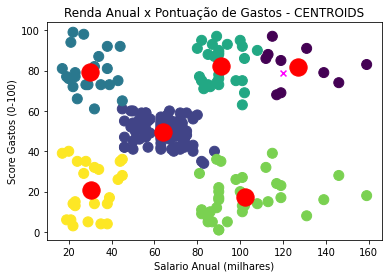

Cluster do novo registro : [0]


In [10]:
## NOVO REGISTRO PARA SER CLASSIFICADO:
# Caso gosariamos de classificar um novo registro Salario Anual (milhares) = 120,  Score Gastos (0-100)= 10).
# Como o K-Means classificará o novo registro:
n1=120
n2=79

import matplotlib.pyplot as plt
plt.scatter(X2[:, 0], X2[:,1], s = 100, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red',label = 'Centroids')
plt.scatter(n1,n2,c = 'magenta', s = 35, marker='x', label = 'Novo Registro')
plt.title('Renda Anual x Pontuação de Gastos - CENTROIDS')
plt.xlabel('Salario Anual (milhares)')
plt.ylabel('Score Gastos (0-100)')
#plt.legend()

plt.show()

# Agrupar um novo registro
data= np.array([[n1, n2]]) 
cluster = kmeans.predict(data)
print('Cluster do novo registro :', cluster )

*EXIBIÇÃO DA CURVA DO COTOVELO, MOSTRANDO AS ITERAÇÕES E O NÚMERO IDEAL DE CLUSTERS*

1 316772.07999999996
2 198401.00202020197
3 124163.58972713198
4 88344.83871970895
5 54185.05318347781
6 44520.733182649805
7 35075.48234012365
8 28476.169977106238
9 25468.155231435234
10 23045.995204461382
11 21364.095466001716
12 18327.254080304076
13 17286.053916100467
14 15549.262662775818
15 13880.11946491946
16 13193.079978354972
17 11967.199849546594
18 10977.364898989894
19 10406.378132538113


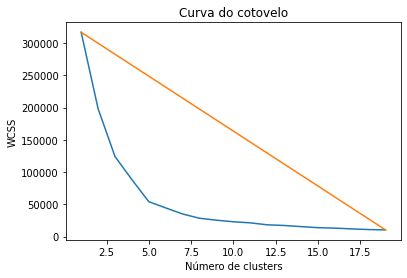

In [10]:
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
    print(i, kmeans.inertia_)
plt.plot(range(1, 20), wcss)
plt.plot([1,19],[wcss[0], wcss[len(wcss)-1]])
plt.title('Curva do cotovelo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

In [11]:
wcss

[316772.07999999996,
 198401.00202020197,
 124163.58972713198,
 88344.83871970895,
 54185.05318347781,
 44520.733182649805,
 35075.48234012365,
 28476.169977106238,
 25468.155231435234,
 23045.995204461382,
 21364.095466001716,
 18327.254080304076,
 17286.053916100467,
 15549.262662775818,
 13880.11946491946,
 13193.079978354972,
 11967.199849546594,
 10977.364898989894,
 10406.378132538113]

**EXECUÇÃO DO KMEANS COM O NÚMERO IDEAL DE CLUSTERS**

In [ ]:
#Insira aqui o código que executa o algoritmo k-means com o número ideal de clusters

In [24]:
n_clusters = 5     # numero de grupos que os dados serão agrupados.Default=8
init = 'k-means++' # Modo de iniciar os centroides Opções: Default:'k-means++', 'random','ndarray'
max_iter = 300     # Quantidade de vezes que irá executar.Default:300 
n_jobs   = 4       # Quantas CPU's:
kmeans = KMeans(n_clusters=n_clusters, init=init, max_iter=max_iter, n_init=10, n_jobs=n_jobs)
kmeans.fit(X2)     #Executar o algoritmo e agrupar os dados
print('Inertia:', kmeans.inertia_)
print("Centroids:")
print(kmeans.cluster_centers_)

Inertia: 54185.05318347781
Centroids:
[[100.17948718  82.12820513]
 [ 64.09876543  49.51851852]
 [102.11428571  17.11428571]
 [ 30.43478261  20.91304348]
 [ 29.77272727  79.36363636]]
C:\Anaconda3\envs\TESTE1\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


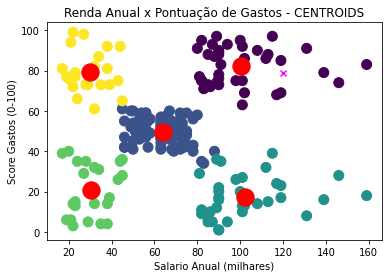

Cluster do novo registro : [0]


In [25]:
## NOVO REGISTRO PARA SER CLASSIFICADO:
n1=120
n2=79

import matplotlib.pyplot as plt

plt.scatter(X2[:, 0], X2[:,1], s = 100, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red',label = 'Centroids')
plt.scatter(n1,n2,c = 'magenta', s = 35, marker='x', label = 'Novo Registro')
plt.title('Renda Anual x Pontuação de Gastos - CENTROIDS')
plt.xlabel('Salario Anual (milhares)')
plt.ylabel('Score Gastos (0-100)')
#plt.legend()

plt.show()

# Agrupar um novo registro
data= np.array([[n1, n2]]) 
cluster = kmeans.predict(data)
print('Cluster do novo registro :', cluster )

In [16]:
print ('A o número de clusters é: ', kmeans.n_clusters) #traz os numeros de clusters

# Coordenada do ponto
print ('A coordenada de cada centróide é: ', kmeans.cluster_centers_) 

# Soma dos quadrados intra-clsters
print('A soma dos quadrados intra-clusters (wcss) do centroíde é: ', kmeans.inertia_)

A o número de clusters é:  4
A coordenada de cada centróide é:  [[100.71052632  18.63157895]
 [ 55.94        56.48      ]
 [ 30.43478261  20.91304348]
 [100.17948718  82.12820513]]
A soma dos quadrados intra-clusters (wcss) do centroíde é:  88344.83871970895


In [26]:
n_clusters = 4     # numero de grupos que os dados serão agrupados.Default=8
init = 'k-means++' # Modo de iniciar os centroides Opções: Default:'k-means++', 'random','ndarray'
max_iter = 300     # Quantidade de vezes que irá executar.Default:300 
n_jobs   = 4       # Quantas CPU's:
kmeans = KMeans(n_clusters=n_clusters, init=init, max_iter=max_iter, n_init=10, n_jobs=n_jobs)
kmeans.fit(X2)     #Executar o algoritmo e agrupar os dados
print('Inertia:', kmeans.inertia_)
print("Centroids:")
print(kmeans.cluster_centers_)

Inertia: 88344.83871970895
Centroids:
[[ 55.94        56.48      ]
 [100.17948718  82.12820513]
 [100.71052632  18.63157895]
 [ 30.43478261  20.91304348]]
C:\Anaconda3\envs\TESTE1\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


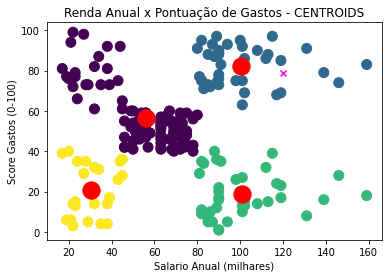

Cluster do novo registro : [1]


In [27]:
## NOVO REGISTRO PARA SER CLASSIFICADO:
n1=120
n2=79

import matplotlib.pyplot as plt

plt.scatter(X2[:, 0], X2[:,1], s = 100, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red',label = 'Centroids')
plt.scatter(n1,n2,c = 'magenta', s = 35, marker='x', label = 'Novo Registro')
plt.title('Renda Anual x Pontuação de Gastos - CENTROIDS')
plt.xlabel('Salario Anual (milhares)')
plt.ylabel('Score Gastos (0-100)')
#plt.legend()

plt.show()

# Agrupar um novo registro
data= np.array([[n1, n2]]) 
cluster = kmeans.predict(data)
print('Cluster do novo registro :', cluster )